In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sms
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import shapiro
from patsy import dmatrices
from IPython.display import display
from sklearn import metrics

In [2]:
## Importando a base
base = pd.read_excel('E:/backup d/FGV/EBAPE/NOVO/2023 Multivariada/Python/besouro_so.xlsx')
base

,Dose,besouros,mortos,sobrev,%obs
0,1.6907,59,6,53,0.1017
1,1.7242,60,13,47,0.2167
2,1.7552,62,18,44,0.2903
3,1.7842,56,28,28,0.5000
4,1.8113,63,52,11,0.8254
5,1.8369,59,53,6,0.8983
6,1.8610,62,61,1,0.9839
7,1.8839,60,60,0,1.0000


In [3]:
#dose = variável independente X
#mortos = variável dependente Y
#sobrev=besouros - mortos

In [4]:
modelo1 = smf.glm('mortos + sobrev ~ Dose', base, family=sm.families.Binomial()).fit()
print(modelo1.summary())
base['ajustado']= modelo1.fittedvalues
base

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['mortos', 'sobrev']   No. Observations:                    8
Model:                              GLM   Df Residuals:                        6
Model Family:                  Binomial   Df Model:                            1
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -18.715
Date:                  Mon, 27 Feb 2023   Deviance:                       11.232
Time:                          22:10:04   Pearson chi2:                     10.0
No. Iterations:                       6   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7175      5.181

,Dose,besouros,mortos,sobrev,%obs,ajustado
0,1.6907,59,6,53,0.1017,0.058601
1,1.7242,60,13,47,0.2167,0.164028
2,1.7552,62,18,44,0.2903,0.362119
3,1.7842,56,28,28,0.5000,0.605315
4,1.8113,63,52,11,0.8254,0.795172
5,1.8369,59,53,6,0.8983,0.903236
6,1.8610,62,61,1,0.9839,0.955196
7,1.8839,60,60,0,1.0000,0.979049


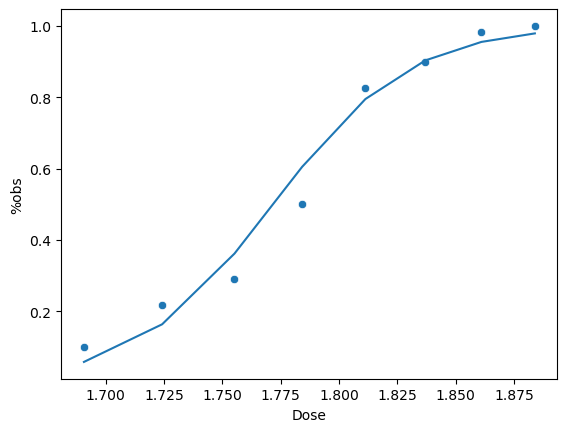

In [5]:
plt.plot(base['Dose'], base['ajustado'])
ax=sns.scatterplot(data=base, x="Dose", y="%obs")

#display plot
plt.show()